# Passwornd Strength

## Dataset Resources

Let’s begin by importing any packages we intend on using.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv', error_bad_lines=False)
data.shape
data.head()

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data.shape

(669640, 2)

## Exploring Data

In [4]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

Now that we have our data and the next step, we can explore, clean and understand the data. We want to see the distribution of our passwords strength level using seaborn countplot function.

In [71]:
import matplotlib.pyplot as plt

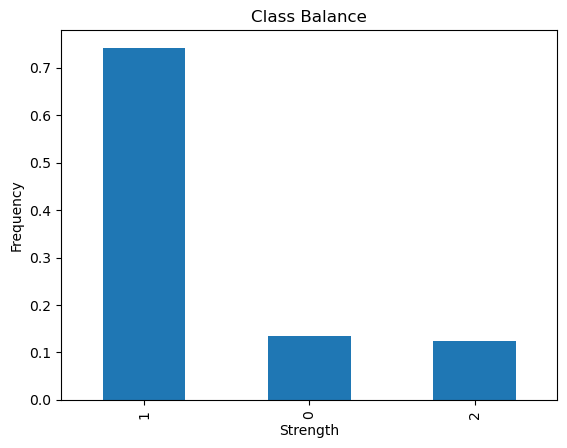

In [72]:
data['strength'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Strength")
plt.ylabel("Frequency")
plt.title("Class Balance");

In [75]:
data[data['strength']==2]

,password,strength
5,AVYq1lDE4MgAZfNt,2
13,WUt9IZzE0OQ7PkNE,2
20,elyass15@ajilent-ci,2
22,klara-tershina3H,2
41,pHyqueDIyNQ8vmhb,2
...,...,...
669618,juanpaganini588@gmail.com,2
669619,tYAam8zg3Mg2AZ7a,2
669622,weslley.06888524,2
669627,sakaryal&#305;,2


Convert our entire data into format of numpy array

Developing machine learning models in Python often requires the use of NumPy arrays. NumPy arrays are efficient data structures for working with data in Python, and machine learning models like those in the scikit-learn library, and deep learning models like those in the Keras library, expect input data in the format of NumPy arrays and make predictions in the format of NumPy arrays. To convert our data, we use np.array() function like this:

In [10]:
password_tuple = np.array(data)
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

For now on, from this array we can easily or simply fetch data in the form of dependent as well as independent features as well. Before extracting independent and dependent feature from the data, we are going to shuffle our data so that it will provide robustness to our model. Because before passing the data for training purpose to any of the machine learning model, if we pass shuffle data, it will provide robustness to our model. So, let's begin with `import random` module, and then call a function `random.shuffle()` to our `password_tuple` it will shuffle our array. 

In [11]:
import random
random.shuffle(password_tuple)

So now from this array we have to extract dependent as well our independent feature. For independent data, we create a list of our first index, it means `[0]` in python, then we are going to store the entire data in `X` variable. While the dependent data, is in the second indext, meaning `[1]`.

In [12]:
x = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

## TF-IDF

TF-IDF is one of the most popular term-weighting schemes today.A numerical statistic that is intended to reflect how important a word is to document in a collection or corpus.The TF-IDF value increases proportionally to the number of times a word appears in the document.

### Apply TF-IDF on the Data

Now on, we will perform TF-IDF on our data. But, very first we have to make sure that the data we have must be a form of character. So, we are going to define our function that will basically split the parameter into characters.

In [13]:
def word_split(inputs):
  character=[]
  for i in inputs:
    character.append(i)
  return character

In [14]:
word_split('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

Now we are applying our TF-IDF using `TfidfVectorizer` from sklearn package.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

Define our vectorizer that achieve a matrix of our data by using `TfidfVectorizer` function

In [16]:
vectorizer = TfidfVectorizer(tokenizer=word_split)
X = vectorizer.fit_transform(x)

In [17]:
X.shape

(669639, 122)

See all the feature of our vectorizer variable.

In [18]:
feature_names = vectorizer.get_feature_names_out()

In [19]:
feature_names

array(['\x01', '\x05', '\x08', '\x10', '\x16', '\x17', '\x19', '\x1b',
       '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&', '(', ')', '*',
       '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
       '{', '|', '}', '~', '\x7f', '\x81', '\x8d', '¡', '«', '¯', '°',
       '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º', '¾', '¿', '×', 'ß',
       'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'ê', 'í', 'ð', 'ñ', 'ò',
       'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', '‚'],
      dtype=object)

In [20]:
first_vector_document = X[0]
first_vector_document

<1x122 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [21]:
first_vector_document.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56673882],
        [0.        ],
        [0.59160735],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [22]:
tf_idf = pd.DataFrame(first_vector_document.T.todense(), index=vectorizer.get_feature_names_out(), columns=['TF-IDF'])
tf_idf.sort_values(by=['TF-IDF'], ascending=False)

,TF-IDF
7,0.591607
5,0.566739
z,0.336008
k,0.291923
d,0.285798
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


## Train the First Model

### Split to Train and Test Dataset



&nbsp;We will split our data into training and validation/test set to validate it on data it has never seen before. The classic approach is to do a simple 80%-20% split. We split out data using train_test_split from sklearn.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape

(535711, 122)

In [26]:
type(X)

scipy.sparse._csr.csr_matrix

In [27]:
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 

### Train the Model

Once we have the input and output prepare, now we will create and define our classification model. We’re going to implement the logistic regression for our first model.

Logistic regression is a fundamental classification technique. It belongs to a group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for us to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression(random_state=0, multi_class='multinomial')

In [30]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

### Evaluate the Model

In [31]:
predict_data = np.array(['123@#ghhgj'])
prediction = vectorizer.transform(predict_data)
clf.predict(prediction)

array([2])

In [32]:
y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)[:,1]

To evaluate our first model we will use accuracy. Accuracy measures the number of labels successfully predicted. We will use metrics fromsklearn package.

In [33]:
from sklearn import metrics

In [34]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: '+str(round(accuracy*100,2))+'%')

Accuracy: 81.79%


### Log the Performance

In [35]:
performance_log = pd.DataFrame(columns=['Experiment', 'Accuracy'])

perform = {
    'Experiment': 'Logistic Regression',
    'Accuracy': str(round(accuracy*100,2))+'%'
}
performance_log = performance_log.append(perform, ignore_index=True)

In [36]:
performance_log

,Experiment,Accuracy
0,Logistic Regression,81.79%


## Modelling Experiment

In machine learning, there’s something called the “No Free Lunch” which means no one algorithm works well for every problem. This is widely applicable in Prediction Models where we train our dataset on an algorithm and later use the trained model for prediction on new data.&nbsp;So, we will try other different algorithms for our classification problem, while using a hold-out “test set” of data to evaluate performance and select the best or the winner.&nbsp;

### Find the Best Model

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Now we will create a dictionary of classifiers and iterate different classification models to evaluate the accuracy and look up the highest accuracy score.&nbsp;

In [38]:
models = {
    'Logistic Regression': LogisticRegression(random_state=0, multi_class='multinomial'),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(criterion = 'entropy', random_state = 0)
}

for model_name, clf in models.items():
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print("Evaluate model: {}".format(model_name))
  accuracy = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy: "+str(round(accuracy*100,2))+'%')
  print("\n")

Evaluate model: Logistic Regression
Accuracy: 81.79%


Evaluate model: Naive Bayes
Accuracy: 74.26%


Evaluate model: Decision Tree
Accuracy: 78.13%


Evaluate model: Random Forest
Accuracy: 98.34%




As it’s clearly visible from our output Random Forest outperformed Logistic Regression, Naive Bayes, and Decision Tree for this problem and turned out to be the best algorithms for the prediction of our problem.&nbsp;

Random Forest is an ensemble tool that takes a subset of observation and a subset of variables to build a decision tree. It builds multiple such decision trees and amalgamates them together to get a more accurate and stable prediction. This is a direct consequence of the fact that by maximum voting from a panel of independent judges, we get the final prediction better than the best judge.

We generally see a random forest as a black box that takes in input and gives out predictions, without worrying too much about what calculations are going on the back end. This black box itself has a few levers we can play with. Each of these levers has some effect on either the performance of the model or the resource — time balance.&nbsp;

In [39]:
clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=123)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Evaluate model: {}".format(model_name))

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: "+str(round(accuracy*100,2))+'%')

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confussion Matrix: ")
print("\n")
print(cm)

Evaluate model: Random Forest
Accuracy: 98.35%
Confussion Matrix: 


[[16789  1305     0]
 [  194 98922   168]
 [    8   531 16011]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18094
           1       0.98      1.00      0.99     99284
           2       0.99      0.97      0.98     16550

    accuracy                           0.98    133928
   macro avg       0.99      0.96      0.97    133928
weighted avg       0.98      0.98      0.98    133928



In [ ]:
clf.predict(X_train)

In [41]:
y_train_pred = clf.predict(X_train)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy: "+str(round(accuracy_train*100,2))+'%')
print("\n")

#confusion matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confussion Matrix: ")
print(cm_train)

print("Classification Report: ")
print(classification_report(y_train, y_train_pred))

Accuracy: 99.99%


Confussion Matrix: 
[[ 71829     36      0]
 [    37 397877      2]
 [     0      3  65927]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71865
           1       1.00      1.00      1.00    397916
           2       1.00      1.00      1.00     65930

    accuracy                           1.00    535711
   macro avg       1.00      1.00      1.00    535711
weighted avg       1.00      1.00      1.00    535711



In [42]:
perform = {
    "Experiment": "Find The Best Model (RandomForest)",
    "Accuracy": str(round(accuracy*100,2))+'%'
}
performance_log = performance_log.append(perform, ignore_index=True)

In [43]:
performance_log

,Experiment,Accuracy
0,Logistic Regression,81.79%
1,Find The Best Model (RandomForest),98.35%


### Hyper-Parameter Tuning

Another way to find the value which results in the best performance of our models is by doing a hyperparameter search. In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training). Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from science into trial-and-error based engineering. Hyperparameters tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations to evaluate the performance of each model.

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
#List of Hyper-parameters will be tested
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)], # Number of subtrees
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]+[None],  # Maximum depth of each subtree
                       min_samples_split = [2, 5, 10],
                       min_samples_leaf = [2, 5, 10]
                      )

In [46]:
hyperparameters

{'n_estimators': [100, 125, 150, 175, 200],
 'max_depth': [10, 43, 76, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [2, 5, 10]}

In [49]:
# # Init
# clf = RandomForestClassifier(criterion = 'entropy', random_state=123)
# clf_tuned = RandomizedSearchCV(clf, hyperparameters, cv=5, random_state=12, scoring='f1_micro', n_iter=4)
# clf_tuned.fit(X_train, y_train)

In [ ]:
# # Predict & Evaluation
# y_pred_tuned = clf_tuned.predict(X_test)

In [50]:
accuracy_tuned = metrics.accuracy_score(y_test, y_pred)
print("accuracy: "+str(round(accuracy_tuned*100,2))+'%')
print("\n")
#confusion matrix
cm_tuned = confusion_matrix(y_test,y_pred)
print("Confussion Matrix: ")
print("\n")
print(cm_tuned)

accuracy: 98.35%


Confussion Matrix: 


[[16789  1305     0]
 [  194 98922   168]
 [    8   531 16011]]


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     18094
           1       0.98      1.00      0.99     99284
           2       0.99      0.97      0.98     16550

    accuracy                           0.98    133928
   macro avg       0.99      0.96      0.97    133928
weighted avg       0.98      0.98      0.98    133928



In [53]:
# y_train_pred_tuned = clf_tuned.predict(X_train)
# accuracy_train_tuned = metrics.accuracy_score(y_train, y_train_pred_tuned)
# print("Accuracy: "+str(round(accuracy_train_tuned*100,2))+'%')
# print("\n")

# #confusion matrix
# from sklearn.metrics import confusion_matrix
# cm_train_tuned = confusion_matrix(y_train, y_train_pred_tuned)
# print("Confussion Matrix: ")
# print("\n")
# print(cm_train_tuned)

### Log Performance

In [54]:
# perform = {
#     "Experiment": "Hyper-Parameter tuning",
#     "Accuracy": str(round(accuracy_tuned*100,2))+'%'
# }
# performance_log = performance_log.append(perform, ignore_index=True)

**Check the Best Hyper-Prameters**

In [55]:
# for key, value in hyperparameters.items() :
#         print(key+':', clf_tuned.best_estimator_.get_params()[key])

In [56]:
performance_log

,Experiment,Accuracy
0,Logistic Regression,81.79%
1,Find The Best Model (RandomForest),98.35%


In [58]:
import pickle
# Save your model as `"model-Random.pkl"`
with open("model_password_strengt_21.pkl","wb") as f:
    pickle.dump(clf,f)

In [59]:
# Save your model as `"model-Random.pkl"`
with open("vectorizer_password_strength_21.pkl","wb") as f:
    pickle.dump(vectorizer,f)

In [60]:
import pickle

filename='model_password_strengt_2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [61]:
filename_2='vectorizer_password_strength_2.sav'
pickle.dump(vectorizer, open(filename_2, 'wb'))